## Importing Libraries

In [23]:
import PIL
from PIL import Image

In [24]:
from IPython.display import display #to display image

In [25]:
import numpy as np
import pandas as pd

In [26]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


## Functions to Generate Images from Random R,G,B Values

In [27]:
# Generate Random R,G,B value
import random
def generate_random_rgb():
    return (int(random.uniform(0,255)), int(random.uniform(0,255)), int(random.uniform(0,255)))

In [28]:
# Create a new image with the given size
def create_image(i, j):
  image = Image.new("RGB", (i, j), color=generate_random_rgb())
  return image

# Get the pixel from the given image
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None
  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel

## Importing Trained Model

In [29]:
#Load model from github into colab
import os
import urllib.request

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
ls

colormodel_trained_89.h5  drive/  sample_data/


In [33]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('/content/colormodel_acu_90.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Initializing Color Classes for Prediction

In [35]:
# Mapping the Color Index with the respective 11 Classes (More Explained in RGB Color Classifier ML Model jupyter notebook)
color_dict={
    0 : 'Red',
    1 : 'Green',
    2 : 'Blue',
    3 : 'Yellow',
    4 : 'Orange',
    5 : 'Pink',
    6 : 'Purple',
    7 : 'Brown',
    8 : 'Grey',
    9 : 'Black',
    10 : 'White'
}

## Input from User to generate 'n' Random RGB images & Predicting their Color Class(Label)

Enter number of images: 100

1/1 [==============================] - 0s 24ms/step


<ipython-input-36-89b68ad69f11>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = color_dict[int(color_index)]


1/1 [==============================] - 0s 24ms/step


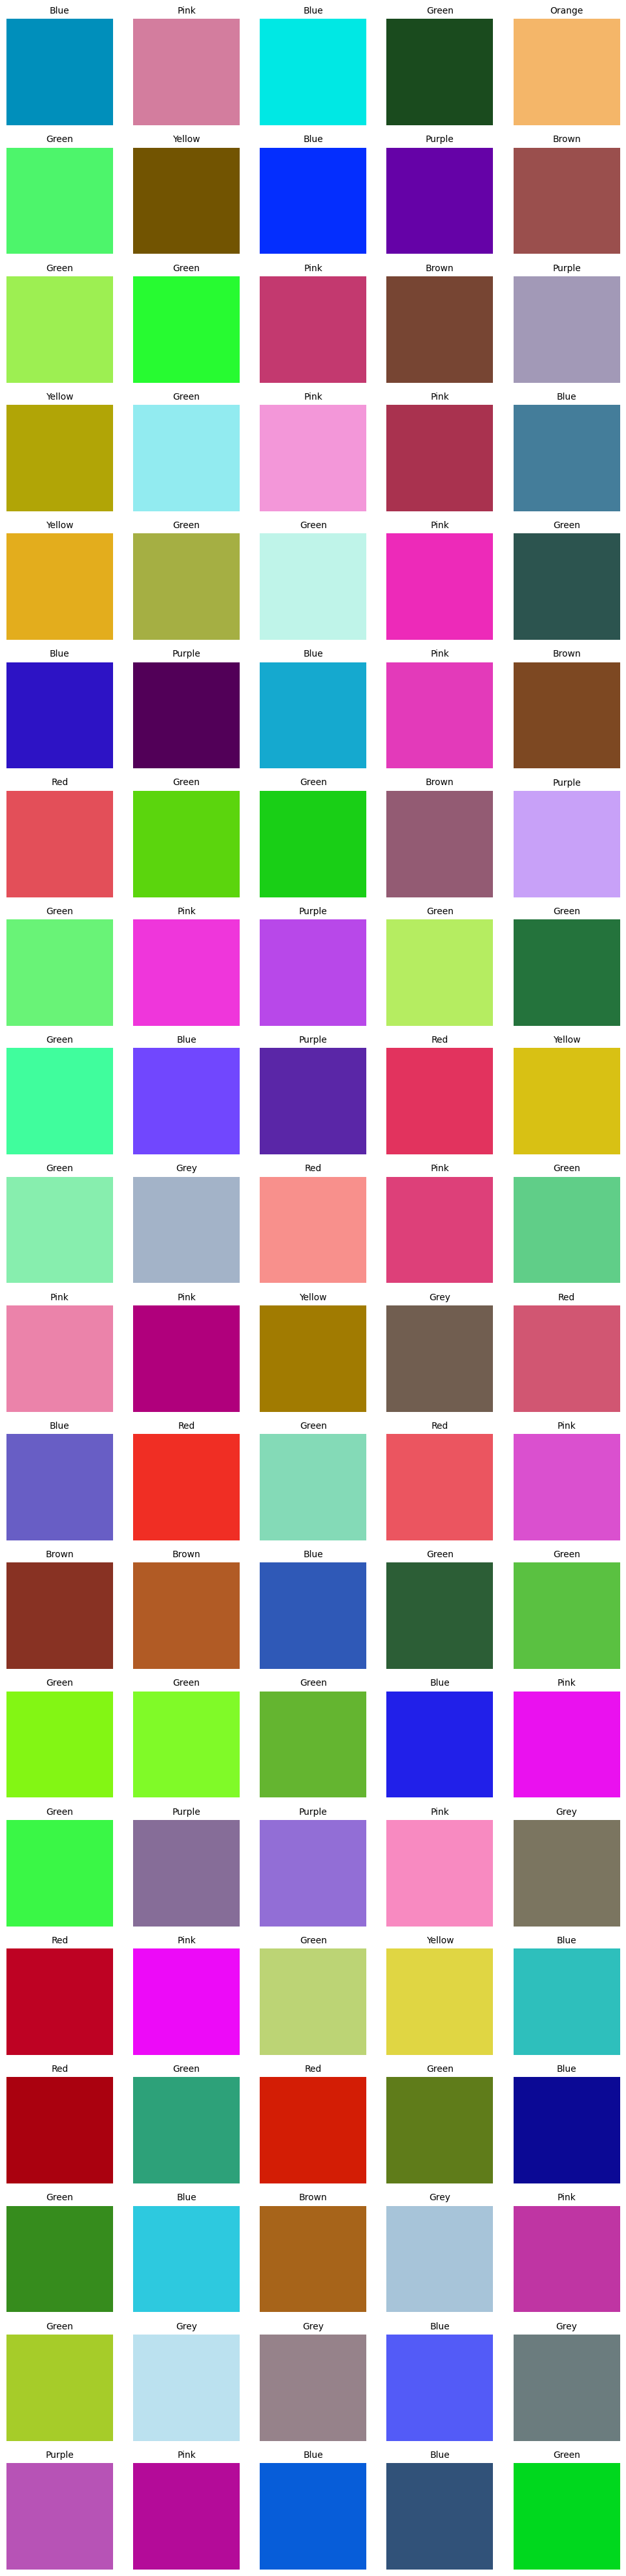

In [36]:
import matplotlib.pyplot as plt
import math

# User input for number of images to be classified
n = int(input("Enter number of images: "))
print()  # Blank line for spacing

# Calculate the number of rows needed
rows = math.ceil(n / 5)

# Create a grid for displaying images and classes
fig, axes = plt.subplots(rows, 5, figsize=(10, rows * 2))

# Predicting from loaded trained_model
for i, ax in enumerate(axes.flat):
    if i < n:
        img = create_image(150, 150)  # (235,235) is the (width,heigth) of the image
        rgb = get_pixel(img, 100, 100)  # any pixel within the image is given
        rgb = np.asarray(rgb)  # rgb to numpy array
        input_rgb = np.reshape(rgb, (-1, 3))  # reshaping as per input to ANN model

        # Display image
        ax.imshow(img)
        ax.set_axis_off()  # Turn off axis labels

        # Predict color class
        color_class_confidence = model.predict(input_rgb)  # Output of layer is in terms of Confidence of the 11 classes
        color_index = np.argmax(color_class_confidence, axis=1)  # finding the color_class index from confidence
        color = color_dict[int(color_index)]

        # Set title as color class
        ax.set_title(color, fontsize=10)  # Adjust fontsize to match the image size

    else:
        ax.axis('off')  # Hide the axis for empty subplots

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
